In [2]:
# Importataion des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import warnings

from scipy.stats import yeojohnson

from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics

from matplotlib.ticker import MaxNLocator
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering

In [3]:
data = pd.read_csv("Vins_Rouges.csv", delimiter=";", decimal=",")

In [4]:
data.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [5]:
data.shape

(178, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [7]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
# Nombre de features dans notre dataframe
nb_features = data.shape[1]
print("Nombre de features:", nb_features)

# Nombre d'enregistrement
nb_enregistrements = data.shape[0]
print("Nombre d'enregistrements:", nb_enregistrements)

# Nombre de valeurs manquantes
nb_total_valeurs_manquantes = data.isnull().sum().sum()
print("Valeurs manquantes:", nb_total_valeurs_manquantes)

# Nombre total de cellules
nb_total_cellules = data.size

# Pourcentage de valeurs manquantes par rapport au nombre total de
# cellules
pourcentage_valeurs_manquantes = (nb_total_valeurs_manquantes / nb_total_cellules) * 100
print("Valeurs manquantes (%):", round(pourcentage_valeurs_manquantes,2))

# Variables qualitatives
features_qualitatives = data.select_dtypes(exclude="number").columns
nb_features_qualitatives = len(features_qualitatives)
print("Features qualitatives:", nb_features_qualitatives)

# Variables quantitatives (numériques)
features_quantitatives = data.select_dtypes(include="number").columns
nb_features_quantitatives = len(features_quantitatives)
print("Features quantitatives:", nb_features_quantitatives)

Nombre de features: 13
Nombre d'enregistrements: 178
Valeurs manquantes: 0
Valeurs manquantes (%): 0.0
Features qualitatives: 0
Features quantitatives: 13


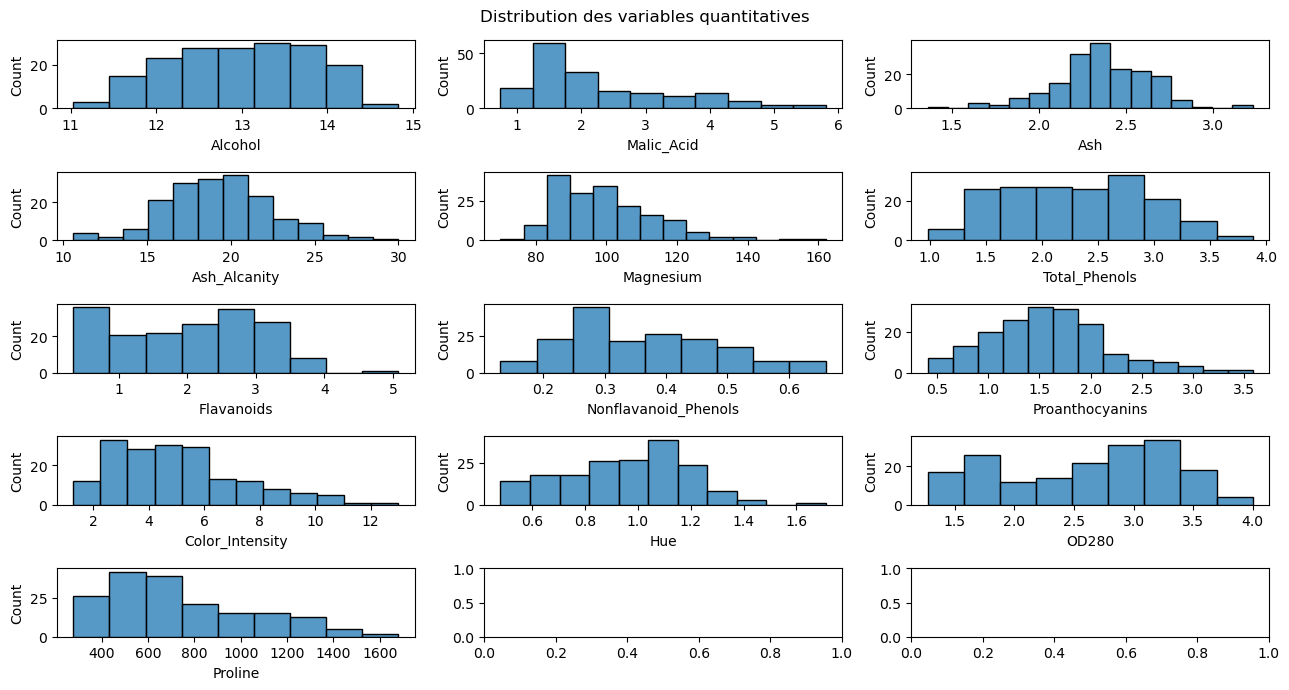

In [9]:
variable_quantitative = data

NUM_COLS = 3
NUM_ROWS = math.ceil(variable_quantitative.shape[1] / NUM_COLS)

_, axes = plt.subplots(NUM_ROWS, NUM_COLS, figsize=(13,7))

for col, ax in zip(variable_quantitative, axes.flatten()):
    sns.histplot(x=col, data=variable_quantitative, ax=ax)
    
plt.suptitle("Distribution des variables quantitatives")
plt.tight_layout()
plt.show()

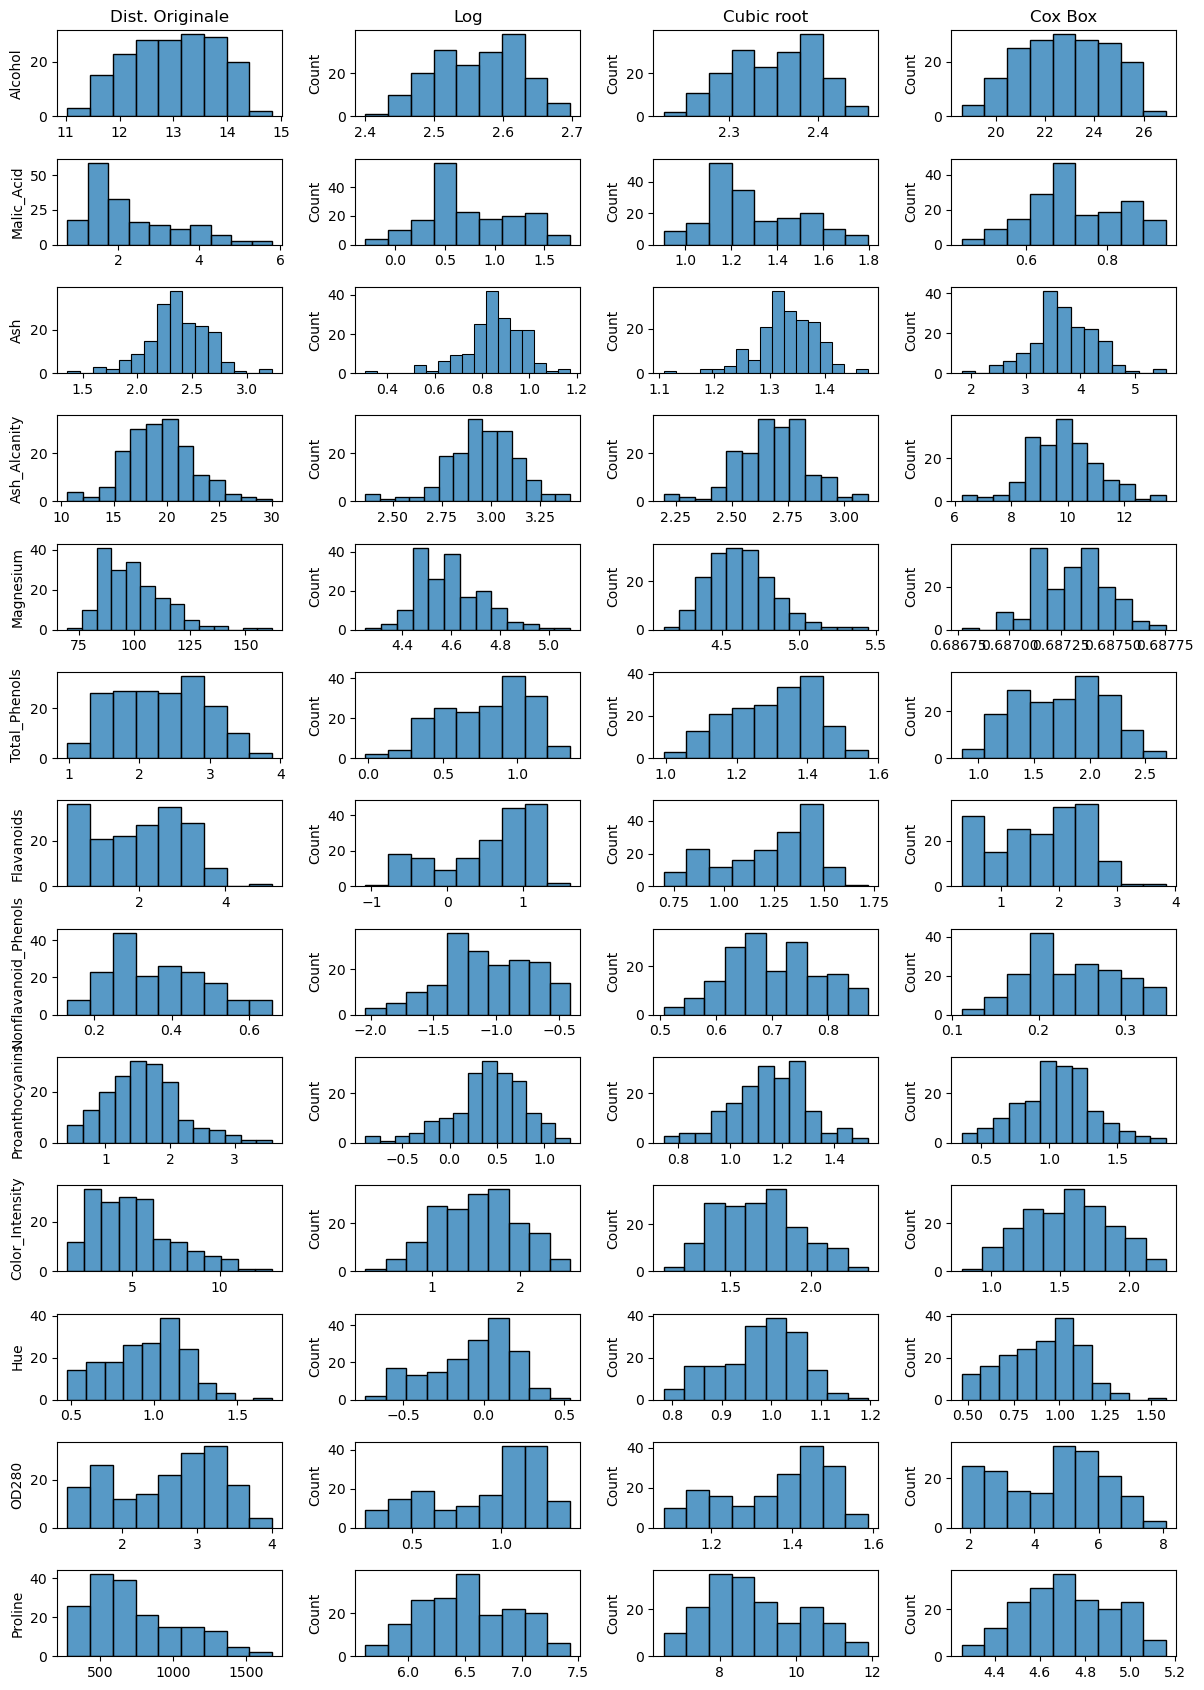

In [10]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=RuntimeWarning)

    coi = variable_quantitative

    _, axes = plt.subplots(coi.shape[1], 4, figsize=(12, 17))

    for col_index, col_name in enumerate(coi):
        dist = coi[col_name]

        axes[col_index, 0].set_ylabel(col_name)

        # normal dist
        sns.histplot(dist.to_numpy(), ax=axes[col_index, 0])

        # log
        new_dist = np.log(dist + 1e-6)
        sns.histplot(new_dist.to_numpy(), ax=axes[col_index, 1])

        # cubic root
        new_dist = np.cbrt(dist)
        sns.histplot(new_dist.to_numpy(), ax=axes[col_index, 2])

        # cox box 
        new_dist, _  = yeojohnson(dist)
        sns.histplot(new_dist, ax=axes[col_index, 3])

    axes[0, 0].set_title("Dist. Originale")
    axes[0, 1].set_title("Log")
    axes[0, 2].set_title("Cubic root")
    axes[0, 3].set_title("Cox Box")

    plt.tight_layout()
    plt.show()

In [11]:
standard_scaler = StandardScaler()
standard_scaled_data = standard_scaler.fit_transform(data)
standard_scaled_df = pd.DataFrame(data=standard_scaled_data, columns=data.columns, index=data.index)
standard_scaled_df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


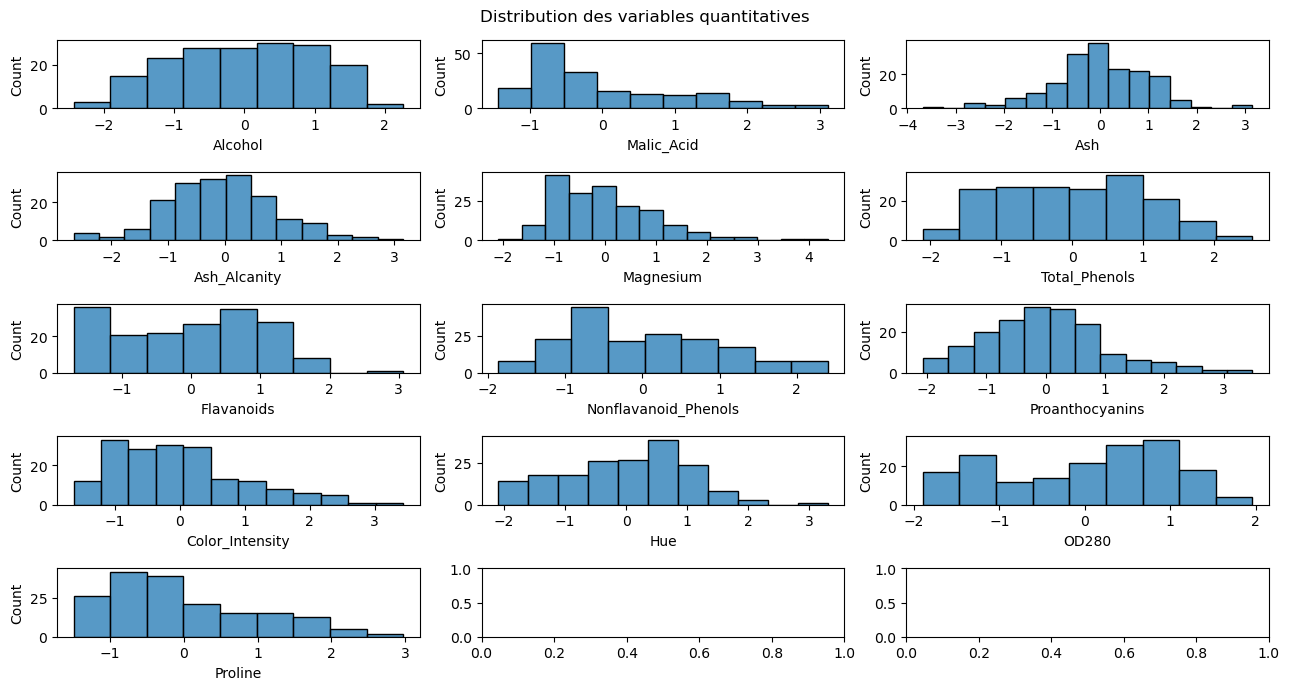

In [12]:
variable_quantitative = standard_scaled_df

NUM_COLS = 3
NUM_ROWS = math.ceil(variable_quantitative.shape[1] / NUM_COLS)

_, axes = plt.subplots(NUM_ROWS, NUM_COLS, figsize=(13,7))

for col, ax in zip(variable_quantitative, axes.flatten()):
    sns.histplot(x=col, data=variable_quantitative, ax=ax)
    
plt.suptitle("Distribution des variables quantitatives")
plt.tight_layout()
plt.show()

Après avoir visualisé les distributions des variables, mon choix a été d'utiliser la méthode de standardisation StandardScaler sur les données.

Nous voyons qu'au départ nos données sont plutôt normales, c'est à dire qu'on peut définir visuellement la courbe gaussienne. Nous ne voyons pas de outliers ou de valeurs abérantes.

Le StandardScaler est conçu pour des données qui suivent une distribution normale. Elle centre les données autour de zéro et les met à l'échelle en utilisant la moyennet et l'écart-type.

Formule: X_standardisé = (X - moyenne(X)) / écart-type(X)

In [13]:
data_scaled = standard_scaled_df

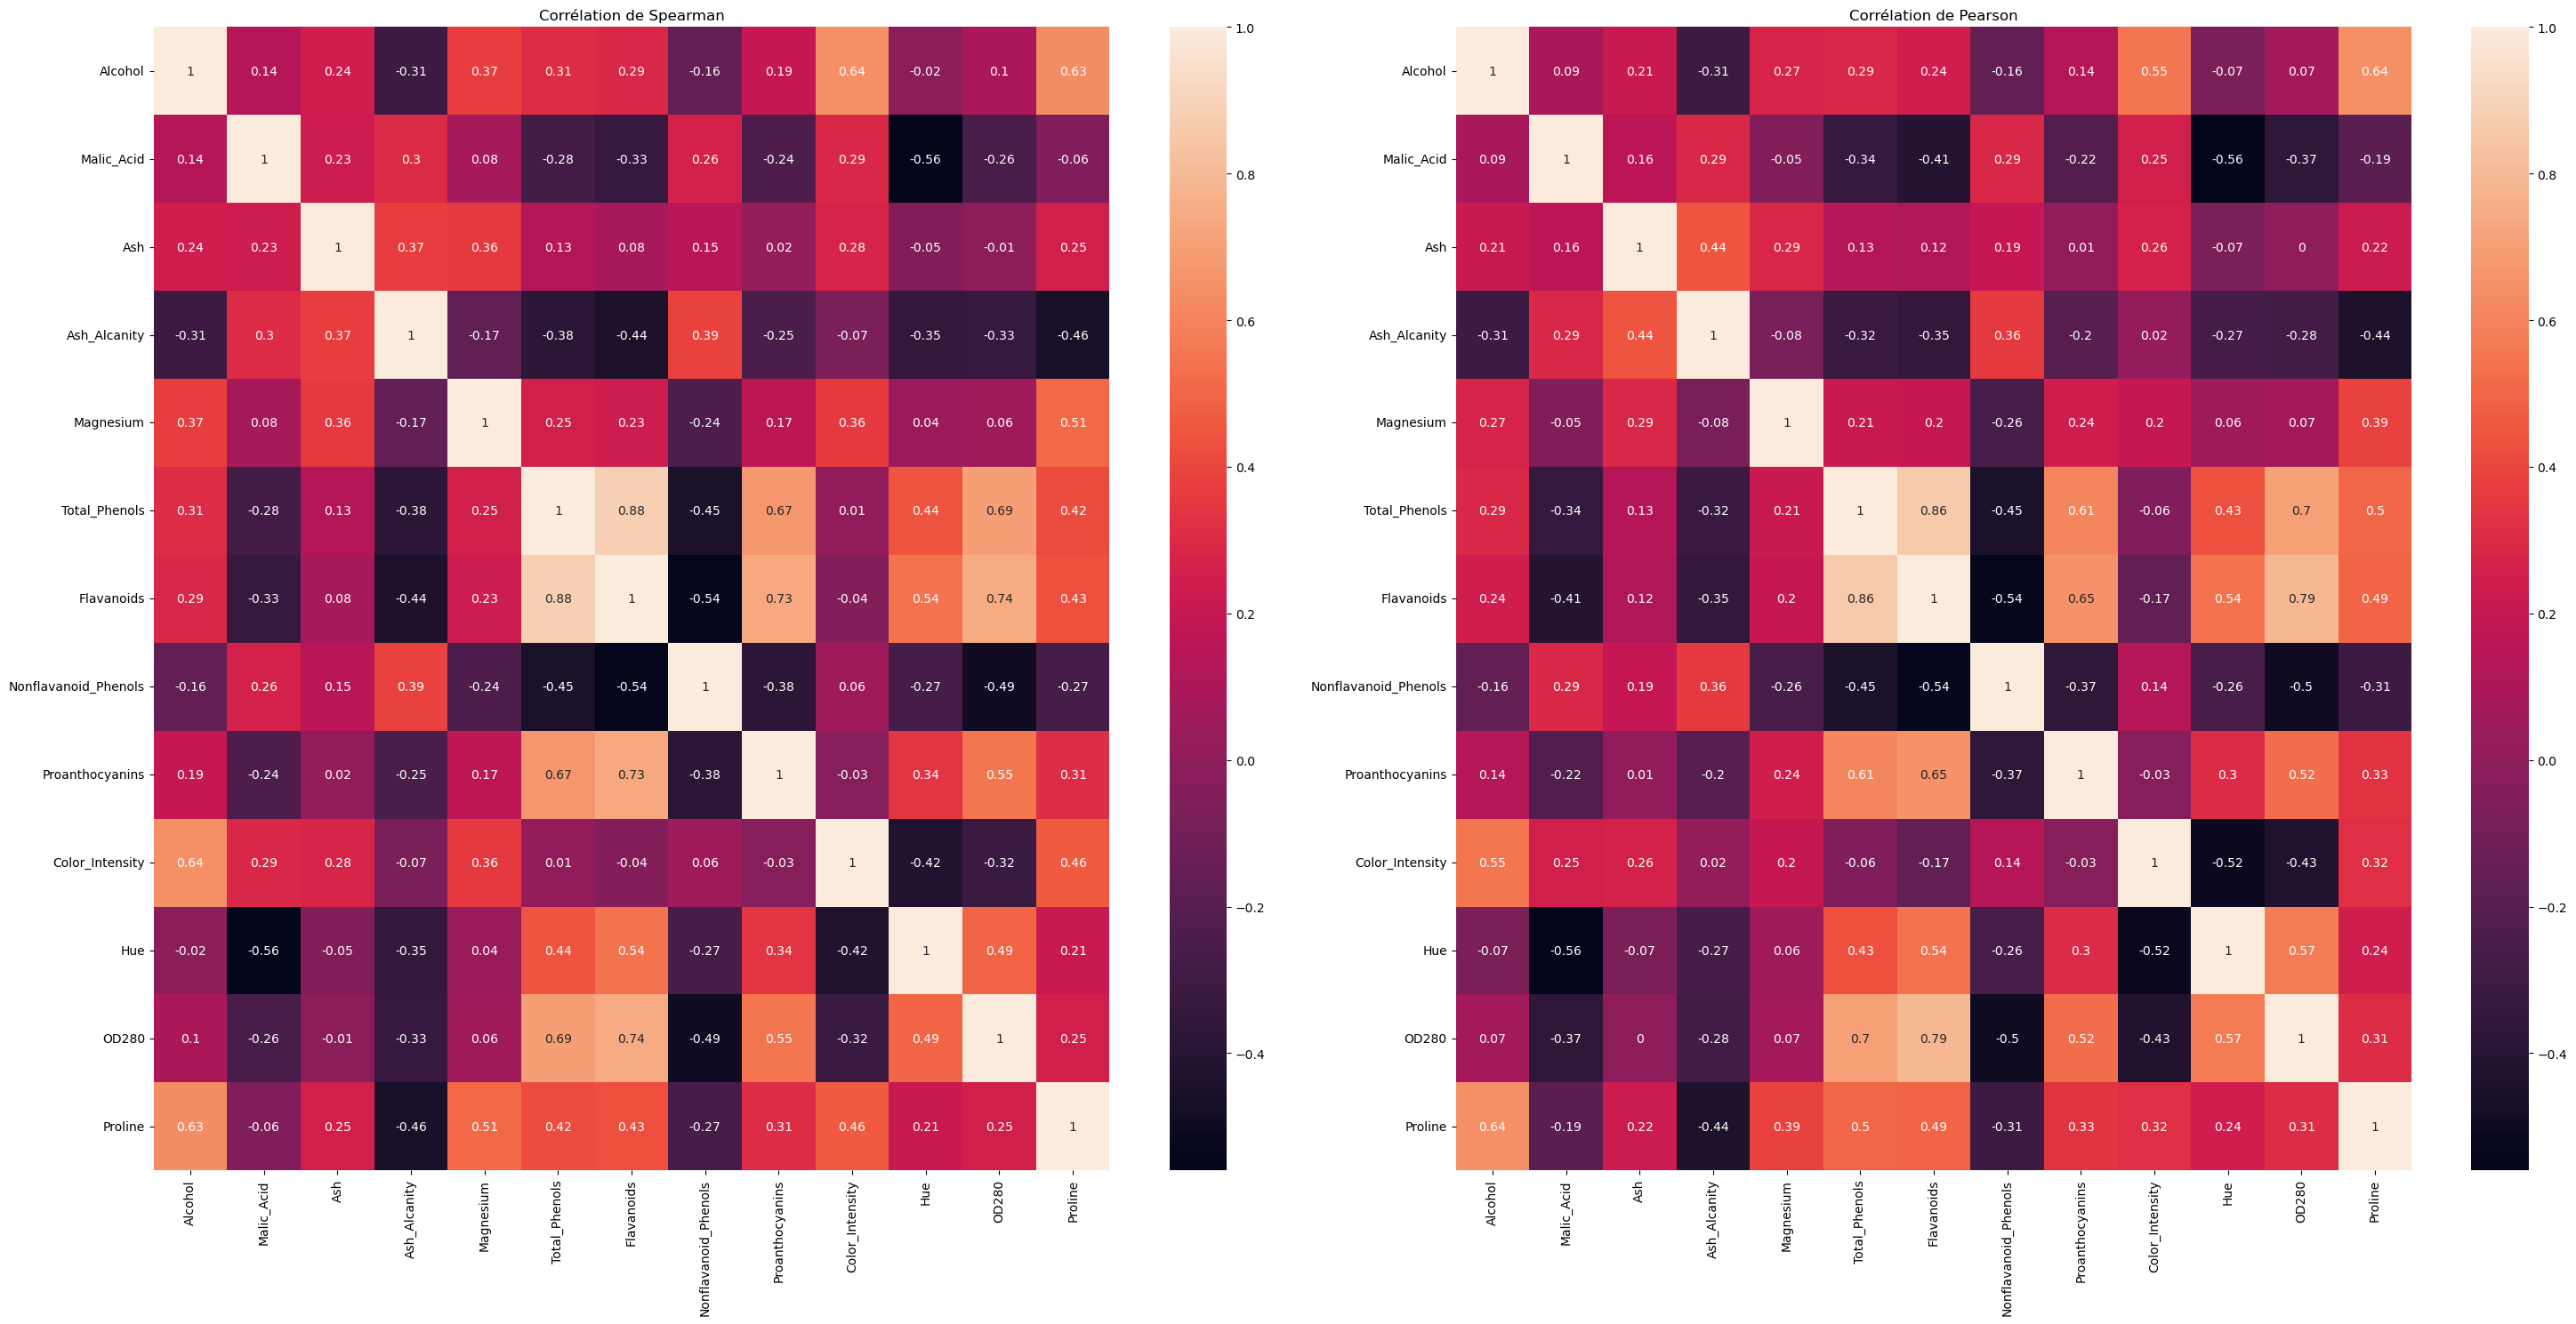

In [14]:
corr_spearman = data_scaled.corr(method="spearman").round(2)
corr_pearson = data_scaled.corr(method="pearson").round(2)

fig, axes = plt.subplots(1, 2, figsize=(30,15))


sns.heatmap(corr_spearman, annot=True, ax=axes[0])
axes[0].set_title("Corrélation de Spearman")

sns.heatmap(corr_pearson, annot=True, ax=axes[1])
axes[1].set_title("Corrélation de Pearson")

plt.tight_layout()
plt.show()

Si les variables sont fortement corrélées, cela indique qu'elles partagent une grande partie de leur variabilité, ce qui signifie qu'on est en mesure de réduire la dimension de nos données en utilisant une ACP.

J'ai utilisé la méthode de Spearman et de Pearson.

Pearson:
Utile lorsqu'on a des données numériques continue et qu'on souhaite mesurer la corrélation linéaire entre deux variables.

Spearman:
N'est pas nécessaire pour les valeurs continue. Elle mesure la corrélation de rang, ce qui signifie qu'il évalue la similarité des ordres relatifs des valeurs des variables, plutôt que de se concentrer sur leurs valeurs réelles. Très robuste aux valeurs aberrantes et aux données qui n'ont pas une distribution gaussienne normale.

Dans notre cas, nous nous fiirons à la corrélation de Pearson car elle correspond à notre cas.

Nous voyons qu'une grande partie de nos données sont en corrélations avec les autres. Donc on peut présager pouvoir concentrer la variabilité des vins sur très peu de dimensions.

In [15]:
acp = PCA(svd_solver="full")

In [16]:
coord = acp.fit_transform(data_scaled)

In [17]:
print(coord)

[[ 3.31675081e+00 -1.44346263e+00 -1.65739045e-01 ... -4.51563395e-01
   5.40810414e-01 -6.62386309e-02]
 [ 2.20946492e+00  3.33392887e-01 -2.02645737e+00 ... -1.42657306e-01
   3.88237741e-01  3.63650247e-03]
 [ 2.51674015e+00 -1.03115130e+00  9.82818670e-01 ... -2.86672847e-01
   5.83573183e-04  2.17165104e-02]
 ...
 [-2.67783946e+00 -2.76089913e+00 -9.40941877e-01 ...  5.12492025e-01
   6.98766451e-01  7.20776948e-02]
 [-2.38701709e+00 -2.29734668e+00 -5.50696197e-01 ...  2.99821968e-01
   3.39820654e-01 -2.18657605e-02]
 [-3.20875816e+00 -2.76891957e+00  1.01391366e+00 ... -2.29964331e-01
  -1.88787963e-01 -3.23964720e-01]]


In [18]:
explained_variance_ratio_perc = acp.explained_variance_ratio_ * 100
print(explained_variance_ratio_perc)

[36.1988481  19.20749026 11.12363054  7.06903018  6.56329368  4.93582332
  4.23867932  2.68074895  2.2221534   1.93001909  1.73683569  1.29823258
  0.79521489]


In [19]:
eigval = acp.explained_variance_
print([eigval])

[array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
       0.64528221, 0.55414147, 0.35046627, 0.29051203, 0.25232001,
       0.22706428, 0.16972374, 0.10396199])]


In [20]:
num_samples = data_scaled.shape[0]
num_features = data_scaled.shape[1]
pca_threshold = 1 + np.sqrt((num_features-1)/(num_samples-1))
print("PCA Threshold:", pca_threshold)

PCA Threshold: 1.2603778219616477


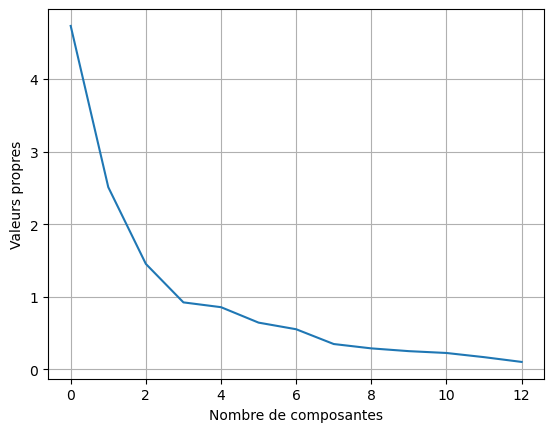

In [21]:
plt.plot(np.arange(num_features), eigval)
plt.ylabel("Valeurs propres")
plt.xlabel("Nombre de composantes")
plt.grid(True)
plt.show()

Nous choississons de prendre 4 composantes principales car selon le graphique ci-dessus, nous voyons que le début du coude est à 4.

In [22]:
n_components = 4

In [23]:
acp = PCA(n_components=n_components, svd_solver="full")
coord=acp.fit_transform(data_scaled)
print(coord)

[[ 3.31675081e+00 -1.44346263e+00 -1.65739045e-01 -2.15631188e-01]
 [ 2.20946492e+00  3.33392887e-01 -2.02645737e+00 -2.91358318e-01]
 [ 2.51674015e+00 -1.03115130e+00  9.82818670e-01  7.24902309e-01]
 [ 3.75706561e+00 -2.75637191e+00 -1.76191842e-01  5.67983308e-01]
 [ 1.00890849e+00 -8.69830821e-01  2.02668822e+00 -4.09765788e-01]
 [ 3.05025392e+00 -2.12240111e+00 -6.29395827e-01 -5.15637495e-01]
 [ 2.44908967e+00 -1.17485013e+00 -9.77094891e-01 -6.58305046e-02]
 [ 2.05943687e+00 -1.60896307e+00  1.46281883e-01 -1.19260801e+00]
 [ 2.51087430e+00 -9.18070957e-01 -1.77096903e+00  5.62703612e-02]
 [ 2.75362819e+00 -7.89437674e-01 -9.84247490e-01  3.49381568e-01]
 [ 3.47973668e+00 -1.30233324e+00 -4.22735217e-01  2.68417600e-02]
 [ 1.75475290e+00 -6.11977229e-01 -1.19087832e+00 -8.90164338e-01]
 [ 2.11346234e+00 -6.75706339e-01 -8.65086426e-01 -3.56438010e-01]
 [ 3.45815682e+00 -1.13062988e+00 -1.20427635e+00  1.62458063e-01]
 [ 4.31278391e+00 -2.09597558e+00 -1.26391275e+00  3.05773190e

In [24]:
last_eigenvalue = acp.explained_variance_[n_components -1 ]
print(last_eigenvalue)

0.924165866824873


Inertie:
La valeur propre de la dernière composantes principale gardée et de 0.92. Cela suggère que cette composante à elle seule explique 92% de la variance totale des données. Cela indique que mon modèle PCA capture efficacement la variance des données avec seulement quelques composantes, cette inertie est considérée comme adequate.

L'inertie doit généralement dépassé le seuil des 70%-80%.

In [25]:
total_explained_variance = np.sum(acp.explained_variance_ratio_) * 100
print(total_explained_variance)

73.59899907589929


Variance expliquée:
Nous obtenons une variance expliquée de 74%, ce qui signifie que les composantes retenues capturent 74% de la variance totale des données originales. C'est considéré comme assez bon et adéquate.

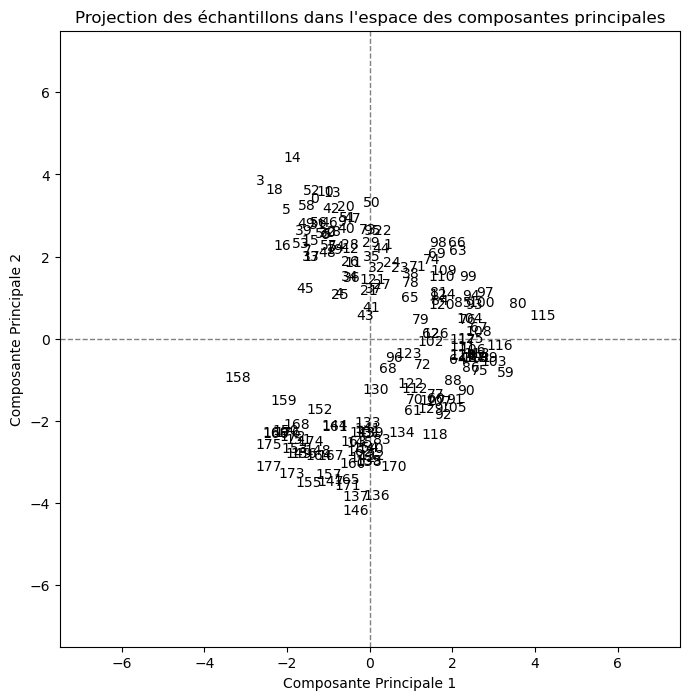

In [26]:
f, ax = plt.subplots(figsize=(8,8))

ax.set_xlim(-7.5,7.5)
ax.set_ylim(-7.5,7.5)

n = data_scaled.shape[0]

for i in range(n):
    ax.annotate(data_scaled.index[i], (coord[i, 1], coord[i, 0]))

ax.axhline(0, color="grey", linestyle="--", linewidth=1)
ax.axvline(0, color="grey", linestyle="--", linewidth=1)

ax.set_xlabel("Composante Principale 1")
ax.set_ylabel("Composante Principale 2")

ax.set_title("Projection des échantillons dans l'espace des composantes principales")

plt.show()

C:\Users\ryann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ryann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ryann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ryann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

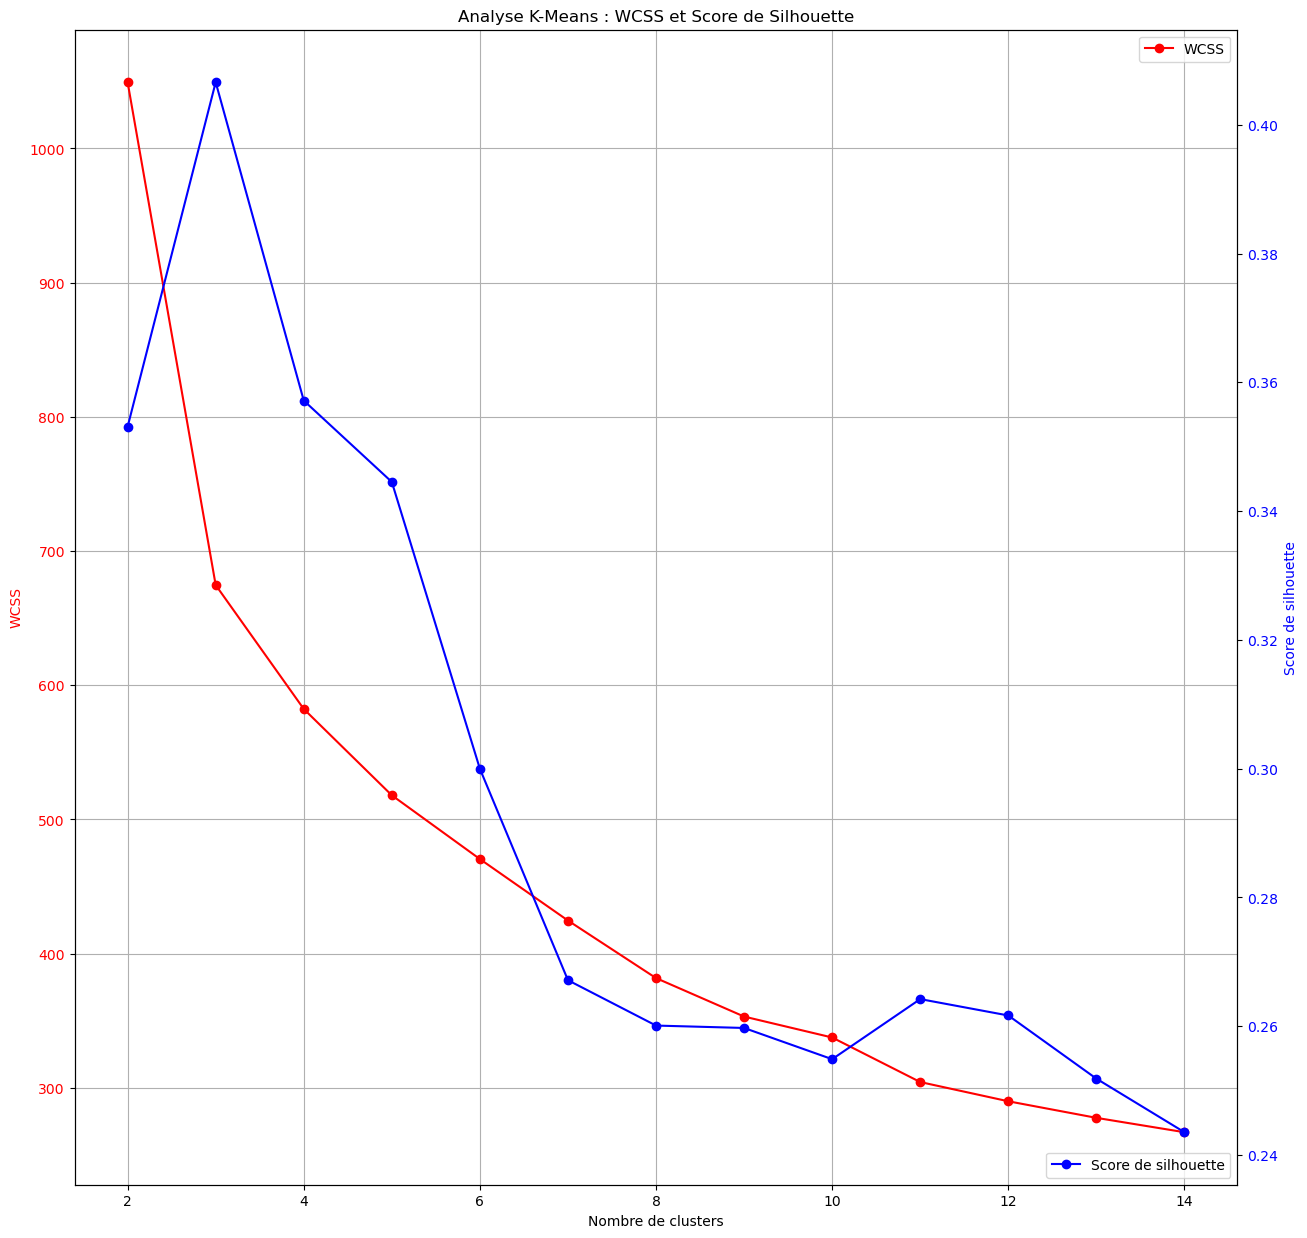

In [27]:
# Initialisation des listes pour stocker les résultats
wcss = []
res = []

# Plage de nombres de clusters à tester
clusters_range = range(2, 15)

# Boucle sur différents nombres de clusters
for k in clusters_range:
    km = KMeans(n_clusters=k, init="k-means++", n_init=10, max_iter=300, random_state=42)
    km.fit(coord)
    wcss.append(km.inertia_)  # WCSS
    res.append(metrics.silhouette_score(coord, km.labels_))  # Score de silhouette

# Création de la figure pour les graphiques
fig, ax1 = plt.subplots(figsize=(15,15))

# Graphique pour WCSS
ax1.plot(clusters_range, wcss, label="WCSS", color="red", marker="o")
ax1.set_xlabel("Nombre de clusters")
ax1.set_ylabel("WCSS", color="red")
ax1.tick_params(axis='y', labelcolor="red")
ax1.grid(True)

# Axe secondaire pour le score de silhouette
ax2 = ax1.twinx()
ax2.plot(clusters_range, res, label="Score de silhouette", color="blue", marker="o")
ax2.set_ylabel("Score de silhouette", color="blue")
ax2.tick_params(axis='y', labelcolor="blue")

# Légendes
ax1.legend(loc="upper right")
ax2.legend(loc="lower right")

# Affichage du graphique
plt.title("Analyse K-Means : WCSS et Score de Silhouette")
plt.show()

Méthode choisie pour l'implémentation des centroides:

Pour le méthode d'initialisation j'ai choisis d'utiliser le "k-mean++", car elle a été conçue pour améliorer la convergence de l'algorithme. Elle choisit des centroides initiaux pour le clustering de KMeans de manière qui espace les centroides aussi loin que possible les uns des autres, ce qui améliore les chances de trouver une solution globale plutot que locale. Dans notre cas, les points sont très proches des autres.

Nombre d'implémentation:

Dans mon cas, j'ai choisis de faire l'implémentation 10 fois, soit le nombre d'implémentation par défaut. Je n'ai pas voulu mettre plus pour plusieurs raison:
Le k-means++ est déjà conçue pour avoir une bonne dispersion des centroides initiaux.

Selon le graphe d'évolutions du score silhouette et de l'inertie intra cluster en fonction du nombre de clusters, selon moi le nombre optimal de clusters est de 3.

Les valeurs minimales et maximales du score de silhouette en théorie sont de -1 à +1.
+1 indique une séparation parfaite des clusters
-1 indique que les points ont été assignés de manière incorrecte à des clusters.

In [28]:
k = 3
kmeans = KMeans(n_clusters=k,init="k-means++", n_init=10, max_iter=300, random_state=42)
kmeans.fit(coord)
labels_kmeans = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia_kmeans = kmeans.inertia_
cluster_labels_kmeans = kmeans.predict(coord)
score_kmeans = metrics.silhouette_score(coord, cluster_labels_kmeans)

C:\Users\ryann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [29]:
print(f'Les étiquettes de cluster sont : {labels_kmeans}')

Les étiquettes de cluster sont : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 1 2 2 2 1
 2 2 2 2 1 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 2 2 1 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [30]:
print(f'Les coordonnées des centroïdes sont : {centroids}')

Les coordonnées des centroïdes sont : [[-2.72003575 -1.12565126 -0.23909324  0.06245694]
 [ 2.25560713 -0.83354578 -0.0393534  -0.14704466]
 [-0.12730065  1.79981758  0.23793107  0.10278385]]


In [31]:
print(f'L\'inertie du modèle KMeans est : {inertia_kmeans}')

L'inertie du modèle KMeans est : 674.6349433774142


In [32]:
print(f'Le score silhouette est: {score_kmeans}')

Le score silhouette est: 0.40659691089486616


In [33]:
df_clustered_kmeans=data_scaled.copy()
df_clustered_kmeans = pd.DataFrame(df_clustered_kmeans)
df_clustered_kmeans["cluster"] = cluster_labels_kmeans
df_clustered_kmeans.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1


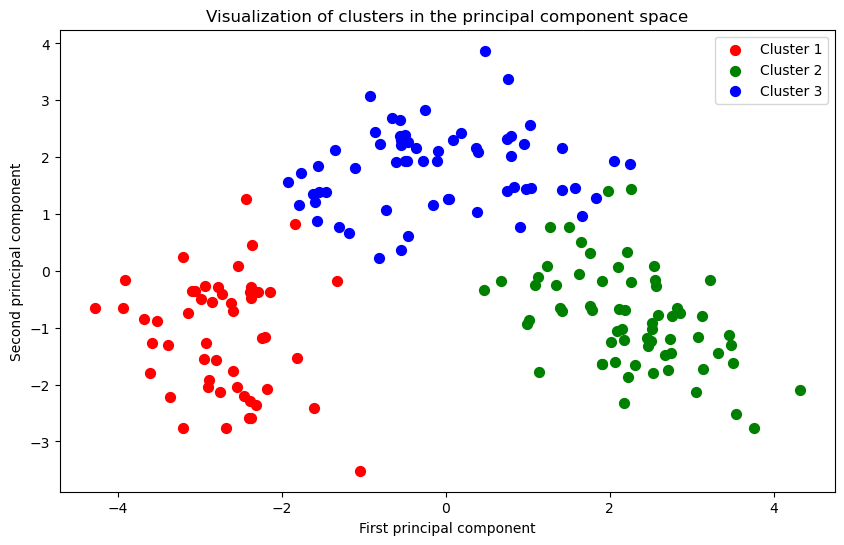

In [34]:
plt.figure(figsize=(10, 6))
colors = ["red", "green", "blue"]
for i in range(k):
    plt.scatter(coord[cluster_labels_kmeans == i, 0], coord[cluster_labels_kmeans == i, 1], s=50, c=colors[i], label=f'Cluster {i+1}')
plt.title("Visualization of clusters in the principal component space")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.legend()
plt.show()

In [35]:
cluster_means_kmeans = df_clustered_kmeans.groupby("cluster").mean()
print(cluster_means_kmeans)

          Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  \
cluster                                                            
0        0.164907    0.871547  0.186898      0.524367  -0.075473   
1        0.756929   -0.341701  0.274792     -0.620765   0.632782   
2       -0.929204   -0.358683 -0.441827      0.219467  -0.601318   

         Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
cluster                                                                     
0            -0.979330   -1.215248              0.726064        -0.779706   
1             0.853863    0.944925             -0.580225         0.619202   
2            -0.089600    0.008992              0.011054        -0.007792   

         Color_Intensity       Hue     OD280   Proline  
cluster                                                 
0               0.941539 -1.164789 -1.292412 -0.407088  
1               0.133725  0.486373  0.750126  1.067733  
2              -0.914687  0.448226  0.276691 

Nous pourrions identifier les variables les plus importantes pour le clustering en examinan le coefficient de détermination (R2). Pour cela il faudra calculer le BSS (Between-Group Sum of Squares) et le TSS (Total Sum of Squares).

In [36]:
m = np.mean(data, axis=0)
TSS = data_scaled.shape[0] * data_scaled.var(ddof=0)
gb = data_scaled.groupby(cluster_labels_kmeans)
nk_kmeans = gb.size()

mk_kmeans = gb.mean()

EMk=  (mk_kmeans-m)**2
EM = EMk.multiply(nk_kmeans, axis=0)
BSS = np.sum(EM, axis=0)
R2_kmeans = BSS/TSS

In [37]:
print("Effectifs par cluster (nk):")
print(nk_kmeans)

Effectifs par cluster (nk):
0    51
1    65
2    62
dtype: int64


In [38]:
print("Moyennes par cluster (mk):")
print(mk_kmeans)

Moyennes par cluster (mk):
    Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0  0.164907    0.871547  0.186898      0.524367  -0.075473      -0.979330   
1  0.756929   -0.341701  0.274792     -0.620765   0.632782       0.853863   
2 -0.929204   -0.358683 -0.441827      0.219467  -0.601318      -0.089600   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0   -1.215248              0.726064        -0.779706         0.941539   
1    0.944925             -0.580225         0.619202         0.133725   
2    0.008992              0.011054        -0.007792        -0.914687   

        Hue     OD280   Proline  
0 -1.164789 -1.292412 -0.407088  
1  0.486373  0.750126  1.067733  
2  0.448226  0.276691 -0.784535  


In [39]:
print("Ratio R2 pour chaque variable:")
print(R2_kmeans)

Ratio R2 pour chaque variable:
Alcohol                    169.533822
Malic_Acid                   5.763609
Ash                          5.705979
Ash_Alcanity               380.289110
Magnesium                 9948.655186
Total_Phenols                5.811370
Flavanoids                   4.867152
Nonflavanoid_Phenols         0.404961
Proanthocyanins              2.845176
Color_Intensity             26.136217
Hue                          1.461798
OD280                        7.531620
Proline                 557850.217663
dtype: float64


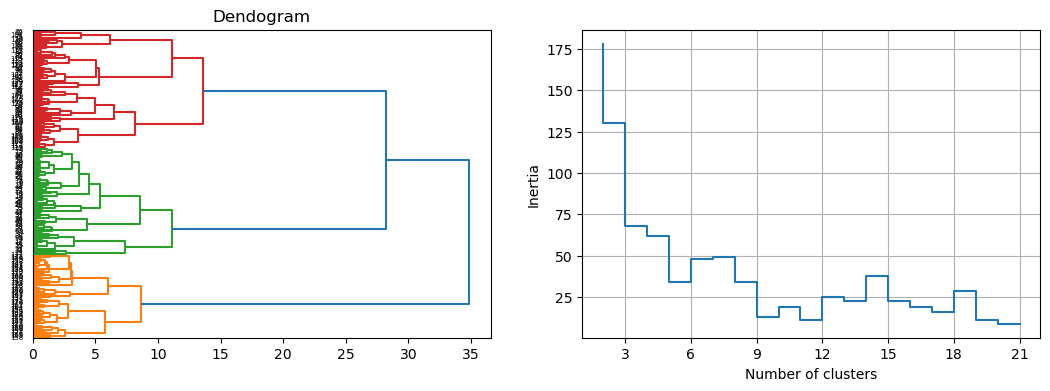

In [43]:
#CAH
Z = linkage(coord,method='ward',metric='euclidean')

c, coph_dists = cophenet(Z, pdist(coord))


figsize=(13, 4) 
num_clusters=20
    
plt.figure(figsize=figsize)
plt.subplot(121)
dendrogram(Z,orientation='right')
plt.title("Dendogram")
        
cluster_inertias = Z[-num_clusters:, 3]
cluster_inertias = cluster_inertias[::-1]
    
plt.subplot(122)
plt.step(range(2, len(cluster_inertias) + 2), cluster_inertias)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.grid()
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    
plt.show()

Nous retrouvons le même nombre de cluster, soit 3 clusters.

Afin de définir le nombre de clusters optimal avec le CAH, j'ai fais un analyse visuelle avec un dendrogramme et un graphique de l'inertie en fonction du nombre de cluster. J'ai utilisé la règle du coude et j'ai choisis 3 clusters. Et je peux confirmer mon choix à l'aide du dendrogramme.

In [41]:
k=3
cah = AgglomerativeClustering(n_clusters=k, metric="euclidean", linkage="ward")
cah.fit_predict(coord)
cluster_labels_cah=cah.labels_

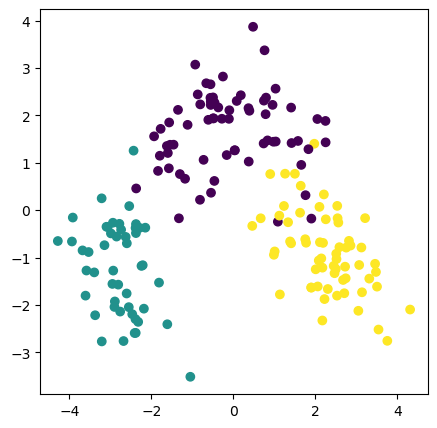

In [44]:
plt.figure(figsize=(5, 5))

colors = ["red", "green", "blue"]

for k in range(k):
    is_kth_cluster = (cluster_labels_cah==k)
    ax.scatter(coord[is_kth_cluster,0],coord[is_kth_cluster,1],c=colors[is_kth_cluster],s=50)

plt.scatter(coord[:,0], coord[:,1], c=cah.labels_)

In [ ]:
score_cah = metrics.silhouette_score(coord, cluster_labels_cah)
print(score_cah)

Avec le CAH, nous obtenons un score silhouette de 39%, comparé à 41% pour le KMeans

In [ ]:
df_clustered_cah =data_scaled.copy()
df_clustered_cah = pd.DataFrame(df_clustered_cah)
df_clustered_cah["cluster"] = cluster_labels_cah
df_clustered_cah.head()

In [ ]:
m = np.mean(data, axis=0)
TSS = data_scaled.shape[0] * data_scaled.var(ddof=0)
gb = data_scaled.groupby(cluster_labels_cah)
nk = gb.size()

mk = gb.mean()

EMk=  (mk-m)**2
EM = EMk.multiply(nk, axis=0)
BSS = np.sum(EM, axis=0)
R2 = BSS/TSS

In [ ]:
print("Effectifs par cluster (nk):")
print(nk)

La répartition des points dans les clusters est un peu différente comparée à celle du KMeans

In [ ]:
print("Moyennes par cluster (mk):")
print(mk)

In [ ]:
print("Ratio R2 pour chaque variable:")
print(R2)

Nous obtenons les mêmes variables les plus importantes

Conclusion:

Nous pouvons conclure que les algorithmes KMeans et CAH nous donnent à peu près les mêmes résultats. Nous obtenons non seulements les mêmes résultats, mais nos clusters sont très bien définis. Dans les deux cas, nous pouvons conclure qu'il y a 3 types de vins. 

Il est logique que 3 vignoles aient été présent. Car il s'agit de 3 types de vins différents.